In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('drug.csv')

In [4]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [7]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [8]:
df['Sex'].value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
sex_enc=LabelEncoder()

In [14]:
drug_df=pd.DataFrame(df.iloc[:,0])

In [15]:
drug_df

,Age
0,23
1,47
2,47
3,28
4,61
...,...
195,56
196,16
197,52
198,23


In [16]:
drug_df['enc_sex']=sex_enc.fit_transform(df['Sex'])

In [17]:
drug_df.headd()

,Age,enc_sex
0,23,0
1,47,1
2,47,1
3,28,0
4,61,0


In [18]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [19]:
df['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [20]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [21]:
bp_enc=LabelEncoder()

In [23]:
drug_df['enc_bp']=bp_enc.fit_transform(df['BP'])

In [24]:
drug_df.head()

,Age,enc_sex,enc_bp
0,23,0,0
1,47,1,1
2,47,1,1
3,28,0,2
4,61,0,1


In [25]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [26]:
df['Cholesterol'].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [27]:
enc_cholestrol=LabelEncoder()

In [29]:
drug_df['enc_cholestrol']=enc_cholestrol.fit_transform(df['Cholesterol'])

In [30]:
drug_df.head()

,Age,enc_sex,enc_bp,enc_cholestrol
0,23,0,0,0
1,47,1,1,0
2,47,1,1,0
3,28,0,2,0
4,61,0,1,0


In [31]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [32]:
drug_df['na_to_k']=df['Na_to_K']

In [33]:
drug_df.head()

,Age,enc_sex,enc_bp,enc_cholestrol,na_to_k
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


In [34]:
df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [38]:
from imblearn.over_sampling import SMOTE

In [41]:
smote=SMOTE()

In [43]:
new_x,new_y=smote.fit_resample(X=drug_df,y=df['Drug'])

In [44]:
new_x

,Age,enc_sex,enc_bp,enc_cholestrol,na_to_k
0,23,0,0,0,25.355000
1,47,1,1,0,13.093000
2,47,1,1,0,10.114000
3,28,0,2,0,7.798000
4,61,0,1,0,18.043000
...,...,...,...,...,...
450,35,0,1,1,9.971149
451,57,0,1,1,7.295447
452,36,1,1,1,9.718867
453,36,0,1,1,11.289008


In [45]:
new_y.value_counts()

DrugY    91
drugC    91
drugX    91
drugA    91
drugB    91
Name: Drug, dtype: int64

In [46]:
import matplotlib.pyplot as plt

<Axes: >

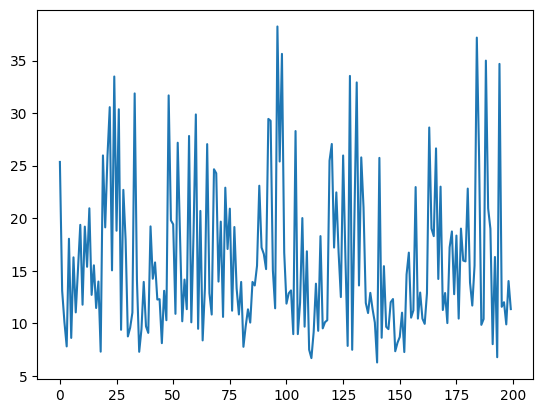

In [48]:
df['Na_to_K'].plot()

In [49]:
import seaborn as sns

In [57]:
df.corr()

C:\Users\Mahan\AppData\Local\Temp\ipykernel_21672\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


<Axes: >

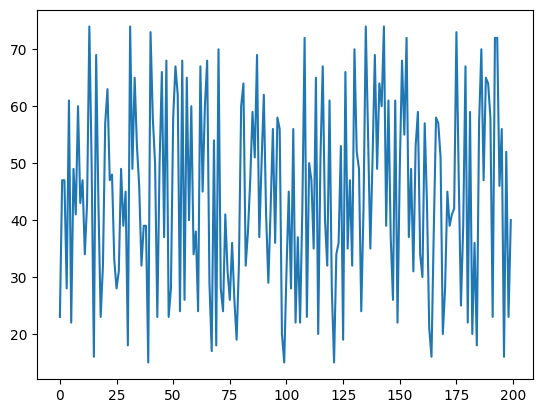

In [58]:
df['Age'].plot()

In [59]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [61]:
new_x.shape

(455, 5)

In [62]:
new_y.shape

(455,)

In [66]:
df.head(2)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC


In [64]:
new_x.head(2)

,Age,enc_sex,enc_bp,enc_cholestrol,na_to_k
0,23,0,0,0,25.355
1,47,1,1,0,13.093


In [63]:
from sklearn.model_selection import train_test_split

In [67]:
xtrain,xtest,ytrain,ytest=train_test_split(new_x,new_y,test_size=0.15)

In [68]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((386, 5), (386,), (69, 5), (69,))

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rfc_model=RandomForestClassifier()

In [72]:
rfc_model.fit(xtrain,ytrain)

RandomForestClassifier()

In [75]:
from sklearn.metrics import accuracy_score

In [76]:
ypred=rfc_model.predict(xtest)

In [77]:
accuracy_score(ytest,ypred)*100

98.55072463768117

In [78]:
import pickle

In [79]:
drug_df.head(1)

,Age,enc_sex,enc_bp,enc_cholestrol,na_to_k
0,23,0,0,0,25.355


In [81]:
pickle.dump(sex_enc,open('sex_encoder.pkl','wb'))

In [82]:
pickle.dump(bp_enc,open('bp_encoder.pkl','wb'))

In [ ]:
pickle.dump(cho,open('sex_encoder','wb'))